# 1. 라이브러리 임포트 및 데이터 불러오기

In [82]:
#라이브러리 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spst
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [83]:
#데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

user_id	사용자의 고유 식별자  
subscription_duration	사용자가 서비스에 가입한 기간 (월)  
recent_login_time	사용자가 마지막으로 로그인한 시간 (일)  
average_login_time	사용자의 일반적인 로그인 시간  
average_time_per_learning_session	각 학습 세션에 소요된 평균 시간 (분)  
monthly_active_learning_days	월간 활동적인 학습 일수  
total_completed_courses	완료한 총 코스 수  
recent_learning_achievement	최근 학습 성취도  
abandoned_learning_sessions	중단된 학습 세션 수  
community_engagement_level	커뮤니티 참여도  
preferred_difficulty_level	선호하는 난이도  
subscription_type	구독 유형  
customer_inquiry_history	고객 문의 이력  
payment_pattern	"  
    사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.  
    - 7: 3개월 모두 결제함  
    - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음  
    - 5: 첫 달과 마지막 달에 결제함  
    - 4: 첫 달에만 결제함  
    - 3: 마지막 2개월에 결제함  
    - 2: 가운데 달에만 결제함  
    - 1: 마지막 달에만 결제함   
    - 0: 3개월 동안 결제하지 않음  
    "  
target	사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냅니다.  

In [84]:
train.head(15)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
7,8c948022,10,20,14.751713,67.821393,10,16,88.567777,3,5,Low,Premium,1,1,1
8,9e6713d2,20,4,12.624582,37.384210,8,8,63.624395,4,4,High,Basic,0,0,1
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1


In [85]:
test.head(15)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,0001d6e9,9,15,11.173051,7.047243,19,15,82.074557,3,5,Low,Premium,2,7
1,0002c77d,11,8,13.448592,24.583327,10,16,80.546040,4,2,Low,Basic,4,4
2,0002df5b,11,28,18.548201,1.707616,9,19,73.676957,5,5,Low,Premium,1,3
3,000b6068,14,17,13.383311,21.391389,12,6,63.314635,0,4,High,Premium,1,5
4,00184a0c,19,6,11.919663,18.126987,8,15,55.899647,1,4,Medium,Basic,1,3
5,001d2775,13,23,14.165483,47.947713,14,13,73.573924,3,5,Medium,Premium,3,1
6,00227b7e,12,16,7.925745,19.677984,13,10,87.431104,3,1,Medium,Basic,3,4
7,002c5b3b,22,18,14.792686,14.099035,2,14,71.740705,5,4,Low,Premium,2,5
8,003ef42c,9,22,20.514370,53.600725,10,15,50.756611,2,5,Low,Premium,2,0
9,00485338,19,28,14.755439,43.287774,3,5,89.055001,2,5,High,Basic,0,0


# 2. 데이터 분석 및 전처리

In [86]:
#데이터 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64
user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_di

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [88]:
#기초 통계 확인

pd.set_option('display.max_columns', None) #모든 값 출력
train.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [89]:
# y값의 비율 보기

train['target'].value_counts()

1    6199
0    3801
Name: target, dtype: int64

In [90]:
def transform_a(value):
    if value == 7:
        return 3
    elif value in (3, 5, 6):
        return 2
    elif value in (1, 2, 4):
        return 1
    else:
        return 0

# 'a' 변수 변환
train['new_payment'] = train['payment_pattern'].apply(transform_a)
test['new_payment'] = test['payment_pattern'].apply(transform_a)

In [91]:
train['new_val1'] = train['average_time_per_learning_session'] * train['subscription_duration']
test['new_val1'] = test['average_time_per_learning_session'] * test['subscription_duration']


In [92]:
train['new_val2'] = train['monthly_active_learning_days'] + train['total_completed_courses'] + train['community_engagement_level'] + train['customer_inquiry_history'] - train['abandoned_learning_sessions']
test['new_val2'] = test['monthly_active_learning_days'] + test['total_completed_courses'] + test['community_engagement_level'] + test['customer_inquiry_history']- test['abandoned_learning_sessions']

In [93]:
train['new_val3'] = (train['average_login_time'] * 60) / train['average_time_per_learning_session']
test['new_val3'] = (test['average_login_time'] * 60) / test['average_time_per_learning_session']

In [94]:
train['new_val4'] = (train['subscription_duration'] * 60) / train['average_time_per_learning_session']
test['new_val4'] = (test['subscription_duration'] * 60) / test['average_time_per_learning_session']

C:\Users\ccg70\AppData\Local\Temp\ipykernel_15024\2851881405.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


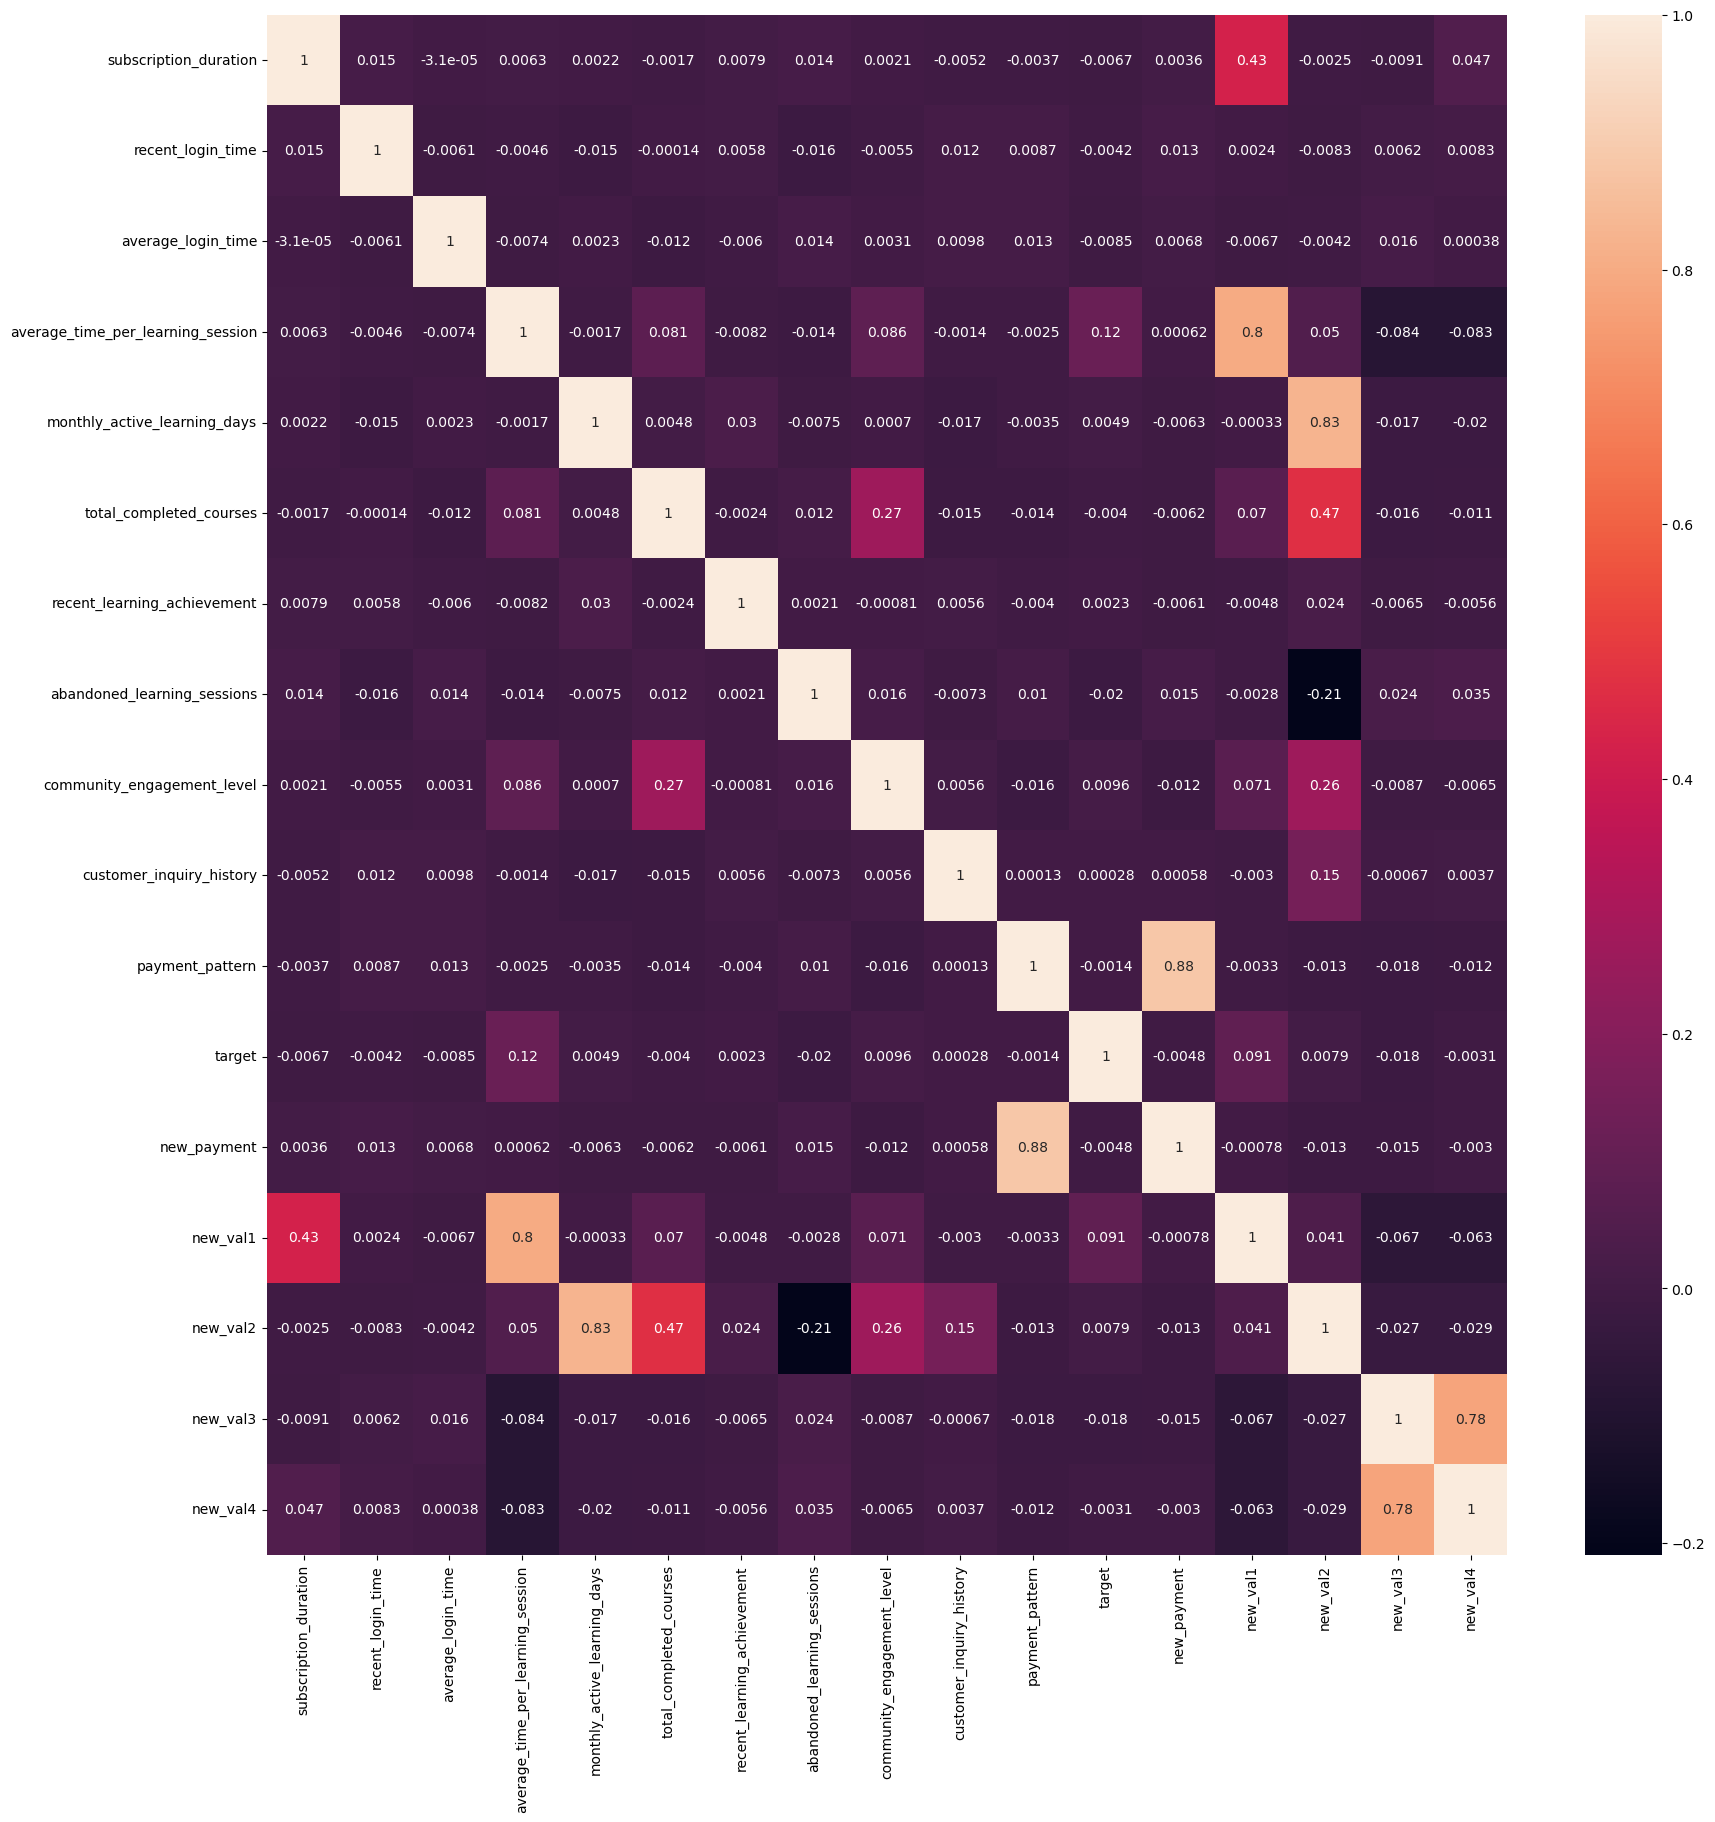

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [96]:
#x, y 분리

x_train = train.drop(columns=['target','user_id'], axis=1)
test_id = test['user_id']
test = test.drop('user_id', axis=1)
y_train = train['target']

In [97]:
from sklearn.preprocessing import LabelEncoder

# 라벨인코딩을 적용할 변수의 리스트를 생성합니다.
features = ['preferred_difficulty_level', 'subscription_type']

# 원하는 값을 지정할 딕셔너리를 생성합니다.
mapping_1 = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

mapping_2 = {
    'Basic': 0,
    'Premium': 1,
}



le = LabelEncoder()
# 라벨인코딩 클래스에 매핑 딕셔너리를 적용합니다.
le.fit(train['preferred_difficulty_level'])
x_train['preferred_difficulty_level'] = x_train['preferred_difficulty_level'].map(mapping_1)

le.fit(train['subscription_type'])
x_train['subscription_type'] = x_train['subscription_type'].map(mapping_2)

# test 데이터도 똑같은 처리
le.fit(test['preferred_difficulty_level'])
test['preferred_difficulty_level'] = test['preferred_difficulty_level'].map(mapping_1)

le.fit(test['subscription_type'])
test['subscription_type'] = test['subscription_type'].map(mapping_2)


In [98]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   subscription_duration              10000 non-null  int64  
 1   recent_login_time                  10000 non-null  int64  
 2   average_login_time                 10000 non-null  float64
 3   average_time_per_learning_session  10000 non-null  float64
 4   monthly_active_learning_days       10000 non-null  int64  
 5   total_completed_courses            10000 non-null  int64  
 6   recent_learning_achievement        10000 non-null  float64
 7   abandoned_learning_sessions        10000 non-null  int64  
 8   community_engagement_level         10000 non-null  int64  
 9   preferred_difficulty_level         10000 non-null  int64  
 10  subscription_type                  10000 non-null  int64  
 11  customer_inquiry_history           10000 non-null  int6

# 3. 모델 

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
test = scaler.fit_transform(test)

In [100]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.35 , random_state=42)

In [101]:
# from imblearn.under_sampling import RandomUnderSampler

# # 소수 클래스의 샘플 수에 맞추어 다수 클래스 언더샘플링
# under_sampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = under_sampler.fit_resample(x_train, y_train)

In [102]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [103]:
y_resampled.value_counts()

1    4031
0    4031
Name: target, dtype: int64

In [104]:
model1 = DecisionTreeClassifier()

model1.fit(X_resampled,y_resampled)


DecisionTreeClassifier()

In [105]:
y_pred = model1.predict(x_val)

In [106]:
print('f1-score:',f1_score(y_val,y_pred,average='micro'))
print(classification_report(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))

f1-score: 0.5428571428571428
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      1332
           1       0.63      0.63      0.63      2168

    accuracy                           0.54      3500
   macro avg       0.52      0.52      0.52      3500
weighted avg       0.54      0.54      0.54      3500

[[ 533  799]
 [ 801 1367]]


In [107]:
X_resampled.shape

(8062, 18)

In [108]:
# params = {"max_depth":range(1,50)}
# model2 = GridSearchCV(DecisionTreeClassifier(), params, cv = 5) 
# model2.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 100)})

In [109]:
# best_model = model2.best_estimator_

# feature_importance = best_model.feature_importances_
# feature_importance

In [110]:
# selected_indices = np.where(feature_importance > 0.05)[0]

# # 올바른 인덱스를 사용하여 데이터 선택
# X_resampled = X_resampled[:, selected_indices]
# x_val = x_val[:, selected_indices]
# test = test[:, selected_indices]


In [111]:
model2 = GridSearchCV(DecisionTreeClassifier(), params, cv = 5) 
model2.fit(X_resampled, y_resampled)
y_pred = model2.predict(x_val)

In [112]:
print('f1-score:',f1_score(y_val,y_pred,average='micro'))
print(classification_report(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))

f1-score: 0.5388571428571428
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      1332
           1       0.63      0.62      0.63      2168

    accuracy                           0.54      3500
   macro avg       0.51      0.51      0.51      3500
weighted avg       0.54      0.54      0.54      3500

[[ 539  793]
 [ 821 1347]]


In [124]:
# 모델 정의
model3 = RandomForestClassifier(random_state=42)

# 탐색할 하이퍼 파라미터 그리드
param_grid = {
    'n_estimators': [5, 10, 20, 50],  # 탐색할 트리의 개수
    'max_depth': [None, 10, 20, 30],  # 탐색할 최대 깊이
    # 다른 하이퍼 파라미터도 추가할 수 있습니다
}

# GridSearchCV를 사용하여 최적의 하이퍼 파라미터 탐색
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# 최적의 하이퍼 파라미터 출력
print("최적의 하이퍼 파라미터:", grid_search.best_params_)

# 최적의 모델을 사용하여 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)

최적의 하이퍼 파라미터: {'max_depth': 30, 'n_estimators': 50}


In [125]:
print('f1-score:',f1_score(y_val,y_pred,average='micro'))
print(classification_report(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))

f1-score: 0.5631428571428572
              precision    recall  f1-score   support

           0       0.39      0.27      0.32      1332
           1       0.62      0.74      0.68      2168

    accuracy                           0.56      3500
   macro avg       0.51      0.51      0.50      3500
weighted avg       0.54      0.56      0.54      3500

[[ 357  975]
 [ 554 1614]]


In [115]:
model4 = XGBClassifier(n_estimators = 100, max_depth = 2)
model4.fit(X_resampled, y_resampled)

y_pred = model4.predict(x_val)

In [116]:
print('f1-score:',f1_score(y_val,y_pred,average='micro'))
print(classification_report(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))

f1-score: 0.5062857142857143
              precision    recall  f1-score   support

           0       0.40      0.60      0.48      1332
           1       0.65      0.45      0.53      2168

    accuracy                           0.51      3500
   macro avg       0.52      0.52      0.51      3500
weighted avg       0.55      0.51      0.51      3500

[[ 799  533]
 [1195  973]]


In [117]:
model5 = CatBoostClassifier(iterations=5000, learning_rate=0.02, depth=5)

model5.fit(X_resampled, y_resampled)

y_pred = model5.predict(x_val)

0:	learn: 0.6918230	total: 3.13ms	remaining: 46.9s
1:	learn: 0.6903204	total: 5.72ms	remaining: 42.9s
2:	learn: 0.6887341	total: 8.41ms	remaining: 42.1s
3:	learn: 0.6880473	total: 10.6ms	remaining: 39.8s
4:	learn: 0.6871416	total: 12.8ms	remaining: 38.3s
5:	learn: 0.6862100	total: 14.9ms	remaining: 37.2s
6:	learn: 0.6853960	total: 16.8ms	remaining: 36s
7:	learn: 0.6846458	total: 19ms	remaining: 35.6s
8:	learn: 0.6839287	total: 21.3ms	remaining: 35.5s
9:	learn: 0.6828642	total: 23.3ms	remaining: 34.9s
10:	learn: 0.6819426	total: 25.4ms	remaining: 34.6s
11:	learn: 0.6811060	total: 27.8ms	remaining: 34.7s
12:	learn: 0.6806335	total: 30ms	remaining: 34.6s
13:	learn: 0.6798441	total: 32.5ms	remaining: 34.8s
14:	learn: 0.6791184	total: 34.6ms	remaining: 34.6s
15:	learn: 0.6783714	total: 36.8ms	remaining: 34.4s
16:	learn: 0.6779569	total: 39.2ms	remaining: 34.6s
17:	learn: 0.6773586	total: 41.2ms	remaining: 34.3s
18:	learn: 0.6766939	total: 43.4ms	remaining: 34.2s
19:	learn: 0.6760734	total: 

In [118]:
print('f1-score:',f1_score(y_val,y_pred,average='micro'))
print(classification_report(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))

f1-score: 0.5485714285714286
              precision    recall  f1-score   support

           0       0.39      0.33      0.36      1332
           1       0.62      0.68      0.65      2168

    accuracy                           0.55      3500
   macro avg       0.51      0.51      0.51      3500
weighted avg       0.54      0.55      0.54      3500

[[ 446  886]
 [ 694 1474]]


In [126]:
y_pred = best_model.predict(test)

# 예시 데이터프레임 생성 (user_id 열만 있는 데이터프레임)
df1 = pd.DataFrame(test_id)
# 예측값 배열 (임의의 값으로 예시 작성)


# 'user_id'와 'target' 열을 가진 데이터프레임 생성
df2 = pd.DataFrame({
    'user_id': df1['user_id'],
    'target': y_pred
})

# 새로운 데이터프레임 출력
print(df2)

       user_id  target
0     0001d6e9       1
1     0002c77d       0
2     0002df5b       1
3     000b6068       1
4     00184a0c       1
...        ...     ...
9995  ffe2eba5       0
9996  ffe710f1       1
9997  ffeccdef       0
9998  fff3fcea       0
9999  fff4b04b       1

[10000 rows x 2 columns]


In [123]:
df2.to_csv('result.csv', index=False)